In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')

In [4]:
df.rename(columns={'NGAYTHI':'NT','DINHHUONGNGHENGHIEP':'NGHE'},inplace=True)

# Phần 1: Xử lý dữ liệu cơ bản

In [5]:
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

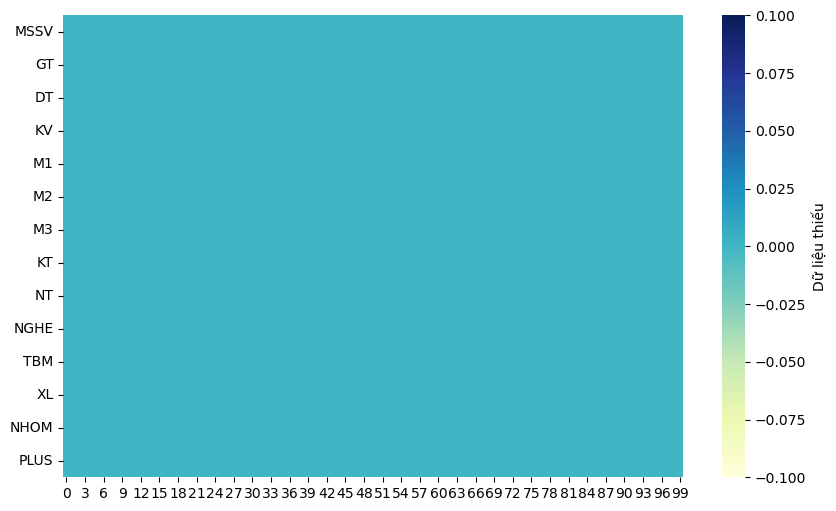

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [8]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

C:\Users\QUANG MINH\AppData\Local\Temp\ipykernel_9696\1825428651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\QUANG MINH\AppData\Local\Temp\ipykernel_9696\1825428651.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)
C:\Users\QUANG MINH\AppData\Local\Temp\ipy

# Phần 2: Kỹ thuật Feature Engineering

In [11]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667


In [14]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


In [17]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


In [18]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM,PLUS
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1,0.0
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3,0.0
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3,0.0
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3,0.0


# Sinh viên tự làm tạo cột MaxM = giá trị lớn nhất của (M1,M2,M3)
# Phần 3: Trực quan hóa dữ liệu

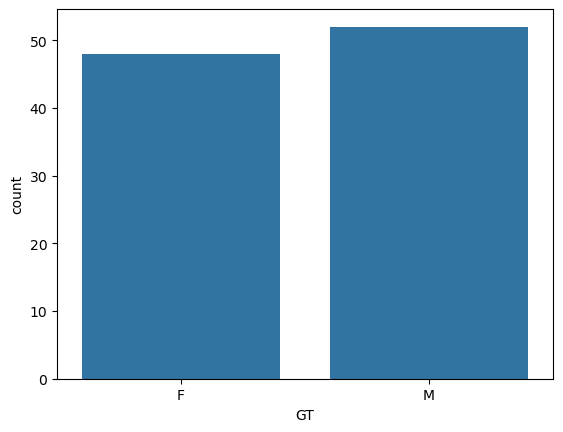

In [22]:
sns.countplot(x='GT', data=df)
plt.show()

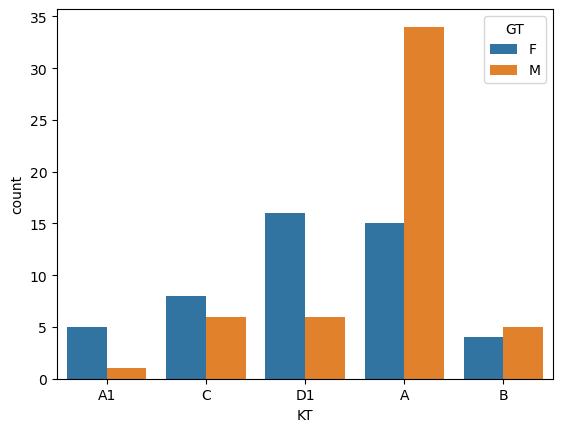

In [23]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

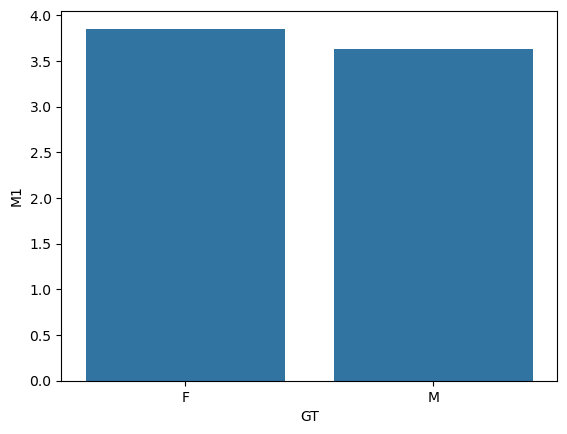

In [24]:
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

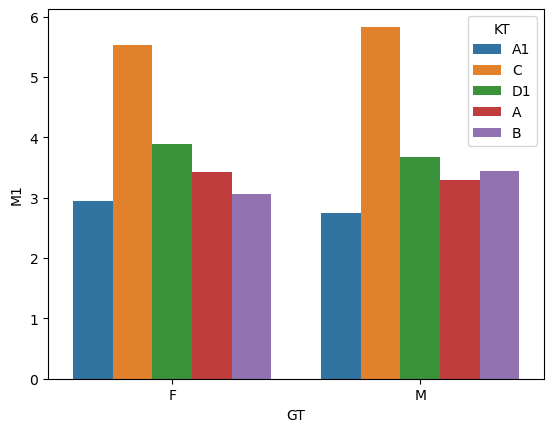

In [25]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

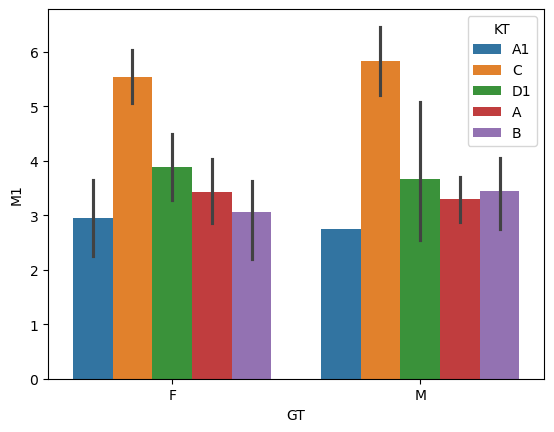

In [26]:
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

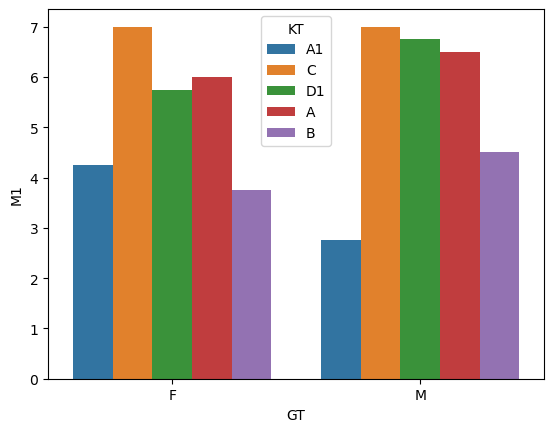

In [27]:
#Hàm max khi gặp thiếu dữ liệu sẽ bị lỗi -> dùng np.max của numpy as np
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

In [ ]:
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

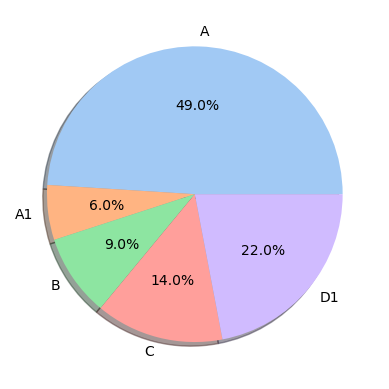

In [37]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

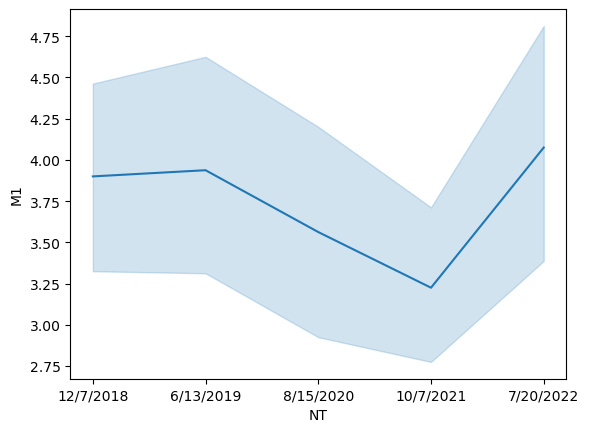

In [29]:
sns.lineplot(x='NT', y='M1', data=df)
plt.show()

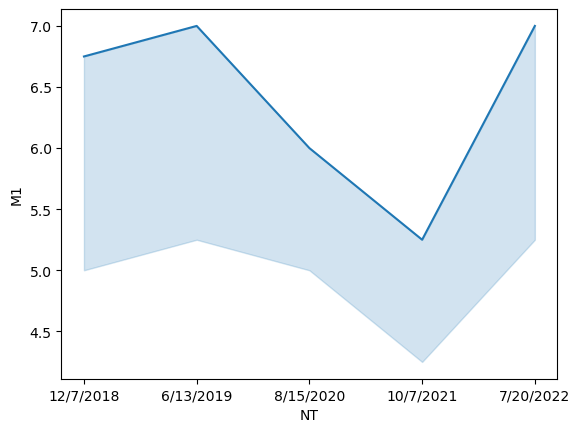

In [30]:
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()

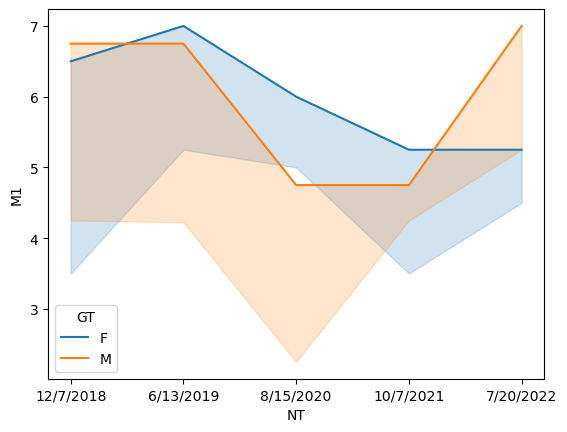

In [35]:
sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

# Phần 4: Phân tích mô tả định lượng - THỐNG KÊ MÔ TẢ

In [40]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5

